In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import copy

path=r'D:/Study/Python/openCV/College/res/'

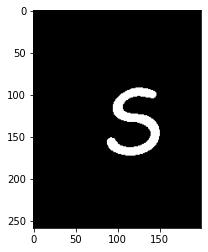

In [3]:
img = cv2.imread(path+'thin.png',0)
plt.imshow(img,'gray')

In [4]:
kernel_tn=[]
kernel_tn.append(np.array([[0,0,0],[2,255,2],[255,255,255]],dtype=np.uint8))
kernel_tn.append(np.array([[2,0,0],[255,255,0],[255,255,2]],dtype=np.uint8))
kernel_tn.append(np.array([[255,2,0],[255,255,0],[255,2,0]],dtype=np.uint8))
kernel_tn.append(np.array([[255,255,2],[255,255,0],[2,0,0]],dtype=np.uint8))
kernel_tn.append(np.array([[255,255,255],[2,255,2],[0,0,0]],dtype=np.uint8))
kernel_tn.append(np.array([[2,255,255],[0,255,255],[0,0,2]],dtype=np.uint8))
kernel_tn.append(np.array([[0,2,255],[0,255,255],[0,2,255]],dtype=np.uint8))
kernel_tn.append(np.array([[0,0,2],[0,255,255],[2,255,255]],dtype=np.uint8))

In [5]:
def con(m1,m2):
    for i in range(3):
        for j in range(3):
            if(m2[i,j]!=2):
                if(m2[i,j]!=m1[i,j]):
                    return False
    return True
def hitandmiss(img,kernel):
    op=np.zeros(img.shape,'uint8') 
    img_pad=cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
    img_res=np.zeros(img.shape,'uint8')
    for k in range(len(kernel)):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if(con(img_pad[i:i+3,j:j+3],kernel[k])==True):
                    img_res[i,j]=255
                else:
                    img_res[i,j]=0
        op=op|img_res
    return op

In [6]:
def thinning(img):
    x1=np.copy(img)
    x=np.zeros(img.shape,'uint8')
    while(True):
        for k in kernel_tn:
            x1=x1-hitandmiss(x1,[k])
        if(np.array_equal(x1,x)):
            break
        x=np.copy(x1)
    return x

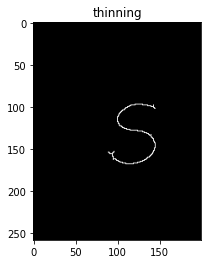

In [7]:
plt.title('thinning')
plt.imshow(thinning(img),'gray')